In [1]:
orders: list[tuple[str, str]]
series: list[list[str]]

with open('05.txt') as f:
    raw_text = f.read().strip()
    raw_order, raw_series = raw_text.split('\n\n')
    orders = [
        tuple(line.split('|'))
        for line in raw_order.splitlines()]
    series = [
        list(line.split(','))
        for line in raw_series.splitlines()]

# Part 1: Safety manuals

Part of how we do this involves **good data structures**. Let's investigate first, shall we?

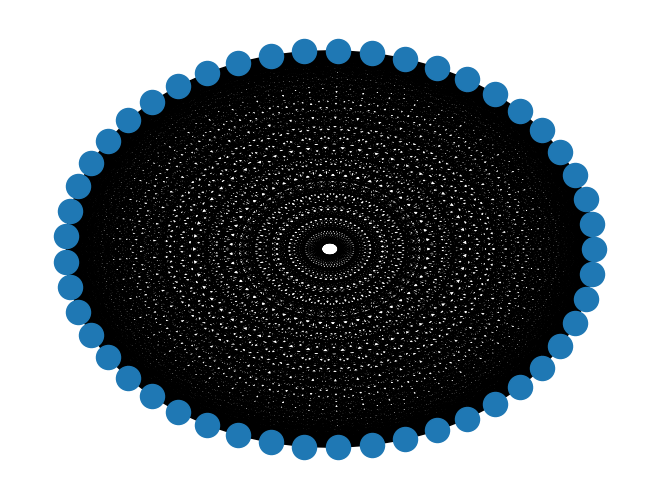

In [2]:
import networkx as nx
G = nx.Graph()

for a, b in orders:
    G.add_edge(a, b)

nx.draw(G, pos=nx.circular_layout(G))

Isn't that beautiful! It's also very telling:

In [3]:
print(len(G.nodes), len(G.edges))
print(len(G.nodes) ** 2)

49 1176
2401


We're going to make the **weak assumption that every order is included.** (Indeed, if we take a peek at the actual orders, we see the first left-number has 1 entry, then 2 entries, then 3 entries and so on.)

This massively simplifies the data structure:

In [4]:
is_ordered: dict[tuple[str, str], bool] = {}
for a, b in orders:
    is_ordered[a, b] = True
    is_ordered[b, a] = False

Let's test!

In [5]:
def pairs[T](series: list[T]):
    for i in range(len(series) - 1):
        yield series[i], series[i+1]

list(pairs(range(6)))

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)]

In [6]:
summand_from_ordered = 0
for xs in series:
    for a, b in pairs(xs):
        if not is_ordered[a, b]:
            break
    else:
        summand_from_ordered += int(xs[len(xs) // 2])
summand_from_ordered

6949

It's not too hard to auto-sort, too, because every pair is already listed – we can leverage Python's own sorting algorithm. (I actually did this solution first!)

In [7]:
class Key(str):
    def __lt__(self, other: 'Key'):
        return is_ordered[self, other]

summand = 0
for xs in series:
    xs_sorted = sorted(Key(x) for x in xs)
    summand += int(xs_sorted[len(xs_sorted) // 2])
summand - summand_from_ordered

4145